# The Laplace Transform and Discontinuous Functions

An important use of the Laplace Transform is that it provides a relatively clean method to handle physical systems that have discontinuous inputs, such as switches that turn on and off or collisions between objects.

## The Heaviside Step Function


A useful tool to study discontinuities is the *Heaviside Step Function*, sometimes called the **unit step function**

````{prf:definition}
:label: Def_Heaviside
The *Heaviside Step Function*, also known as the *unit step function* is a function $H_a(t)$ defined by 

$$
H_a(t) = \begin{cases} 0 & t < a\\
                       1 & t \geq a
                       \end{cases}
$$
````

This function is defined so that at $t=a$, it is continuous from the right hand side.  Although this is the form we use, often others will define it to be $0$ at $t=a$ in which case it is continuous from the left hand side.  Another common choice is that it is equal to $0.5$ at $t=a$ so that it splits the difference between the two limits.

For the purposes of solving differential equations, any of these definitions can be used without changing any of our results.  The value of a function at a single point has no impact on the integral, and so the Laplace Transform of all of these will be the same.

### $H_a(t)$ as a shifted version of $H_0(t)$
It will be convenient for our analysis to use $H_a(t)$.  However, most computer programming languages that have a built-in Heaviside Function only define $H_0(t)$, a function that is $0$ for $t<0$ and $1$ for $t>1$ (with varying choices about how to handle $t=0$).

So it will be useful to know how $H_a(t)$ and $H_0(t)$ are related.  Since $H_a(t)$ is simply a shift of $H_0(t)$ by a distance $a$, we have 

$$
H_a(t) = H_0(t-a)
$$  

You can also verify this from the definitions. The function $H_a(t)$ is $1$ if $t>a$, while $H_0(t-a)$ is $1$ if $t-a>0$ which is equivalent to $t>a$.  Similarly $H_a(t)$ is $0$ if $t<a$, while $H_0(t-a)$ is $0$ if $t-a<0$ which is equivalent to $t<a$.



## Implementing the Heaviside Function Computationally
The standard way to implement the Heaviside Function in Matlab without using special toolboxes is described here: https://au.mathworks.com/help/signal/gs/impulse-step-and-ramp-functions.html.

The code cell below implements this for $a=3$

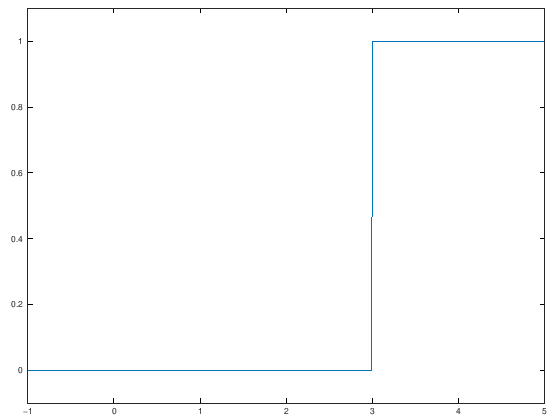

In [7]:
graphics_toolkit("gnuplot") # gnuplot is currently the only way I can get 
                            # matlab/octave to display using this format
                            # However, it is not ideal - there is no control over
                            # font sizes, line widths, or ability to interact
                            # with the plot.
                            
t = linspace(-1,5,601);
H3 = t>=3;   #This is 0 where t<3 and 1 for t>=3
plot(t, H3)
ylim([-0.1,1.1]) #make axes a bit larger so that it's clearer.

Notice that although the function is discontinuous at $t=3$, Matlab will still draw a line from the last point before $t=3$ to the first point with $t \geq 3$.

## The transform of $H_a(t) f(t-a)$

We encounter functions like $H_a(t) f(t-a)$ when a switch is abruptly flipped at time $a$.  When we later solve Equation {eq}`eq:basic_driven_ODE`, we will take the Laplace Transform of both sides.  If the right hand side is discontinuous, then we need to be able to calculate its transform.  We have from the definition of the Laplace Transform:
\begin{align*}
\mathcal{L}[H_a(t)f(t-a)](s) &= \int_0^\infty H_a(t) f(t-a) e^{-st} \, dt\\
&= \int_0^a 0 \, dt + \int_0^a f(t-a)e^{-st} \, dt
\end{align*}
using the fact that $H_a(t)=0$ for $t<a$ and $1$ for $t>a$.  Now we do a $u$-substitution, with $u = t-a$.  So $du/dt = 1$ and $du=dt$.  When $t=a$, $u=0$ and as $t \to \infty$, we also have $u \to \infty$.  So
\begin{align*}
\mathcal{L}[H_a(t)f(t-a)](s) &= \int_0^\infty f(u) e^{-s(u+a)} \, du\\
&= e^{-sa} \int_0^\infty f(u) e^{-su} \, du\\
&= e^{-sa} \mathcal{L}[f(t)](s)
\end{align*}
In the last step, we used the fact that the integral in that step is the definition of the Laplace Transform of $f$.  So we have

$$
\mathcal{L}[H_a(t) f(t-a)](s) = e^{-sa} \tilde{f}(s)
$$

## Preparing a piecewise continuous function for the Laplace Transform
In {numref}`Lap:Table` {ref}`Lap:Table`, we have

$$
\mathcal{L}[H_a(t) f(t-a)](s) = e^{-as} \tilde{f}(s)
$$

We will see how to write a piecewise continuous function as the sum of functions of the form $H_a(t) f(t-a)$.  This will allow us to take their Transform.

We can use the Heaviside Step Function to compactly write functions with discontinuous jumps.

Consider the function defined for $t \geq 0$ by

$$
f(t) = \begin{cases}
 t &  0 \leq t < 3\\
 t - t^2 & 3 \leq t 
 \end{cases}
$$

Without using the Heaviside function, this is not very compact, and working with it computationally is a little awkward.   We plot $f(t)$ below:

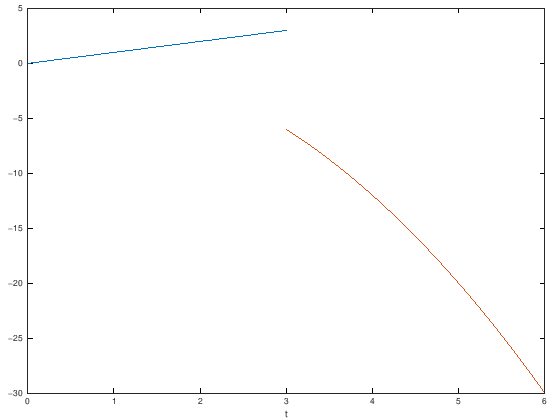

In [22]:
t1 = linspace(0,3, 61);
t2 = linspace(3,6, 61);

plot(t1, t1)       #notice that if we don't specify color, these end up different
hold on
plot(t2, t2- t2.^2)
xlabel('t')

### The Laplace Transform of a Piecewise Continuous Function
Now we introduce a procedure that will convert $f(t)$ into the sum of functions that can be transformed using the Laplace Transform Table.

````{prf:example} Finding the Laplace Transform of $f(t) = \begin{cases} t &  0 \leq t < 3\\ t - t^2 & 3 \leq t \end{cases}$ 


We see that a jump occurs at $t=3$. We will write $f(t)$ as a continuous function $f_0(t)$ plus $H_3(t)$ times another continuous function $f_1(t)$:

$$
f(t) = f_0(t) + H_3(t) f_1(t)
$$

From looking at $t<3$ (where $H_3(t) f_1(t)=0$), the left hand side is $t$, so we have $t = f_0(t)$.  Thus we conclude that $f_0(t) = t$.

From looking at $t>3$, the left hand side is $t-t^2$ and the right hand side is $f_0(t) + f_1(t)$.  Setting these equal and using $f_0(t)=t$ we have

$$
t-t^2 = t + f_1(t)
$$

so $f_1(t) = -t^2$

We arrive at the compact form

$$
f(t) = t - H_3(t) t^2
$$

If we attempt to take the Laplace Transform of this using {numref}`Lap:Table` {ref}`Lap:Table` the second term gives us trouble.  The table tells us that $\mathcal{L}[H_3(t) g(t-3)](s) = e^{-3s} \tilde{g}(s)$, but we don't have a function of $t-3$, we have a function of $t$.  So we need to rewrite $t^2$ as $g(t-3)$ for some $g(t)$.  We have $g(t-3) = t^2$, so substituting in $t+3$ for $t$, we get $g(t+3-3) = (t+3)^2$, and so $g(t) = (t+3)^2$.

Then 

$$
f(t) = t - H_3(t) g(t-3)
$$

where $g(t) = (t+3)^2 = t^2+6t+9$.  For the Laplace Transform, we have

$$
\mathcal{L}[f(t)](s) = \mathcal{L}[t](s) - \mathcal{L}[H_3(t)g(t-3)](s)\\
$$

From {numref}`Lap:Table` {ref}`Lap:Table`, the transform of $t$ is $1/s^2$, while the transform of $H_3(t)g(t)$ is
\begin{align*}
\mathcal{L}[f(t)](s) &= \frac{1}{s^2} - \mathcal{L}[H_3(t)g(t-3)](s)\\
 &= \frac{1}{s^2} - e^{-3s}\mathcal{L}[g(t)](s)\\
&= \frac{1}{s^2} - e^{-3s} \mathcal{L}[t^2+6t+9]\\
&= \frac{1}{s^2} - e^{-3s} \left( \frac{2!}{s^3} + \frac{6}{s^2} + \frac{9}{s}\right)
\end{align*}
and so

$$
\tilde{f}(s) = \frac{1}{s^2} - e^{-3s} \left( \frac{2!}{s^3} + \frac{6}{s^2} + \frac{9}{s}\right)
$$

````

The computational cell below and the resulting plot attempts to show how $f_0(t)$, $f_1(t)$, and $H_3(t)$ are related to $f(t)$.

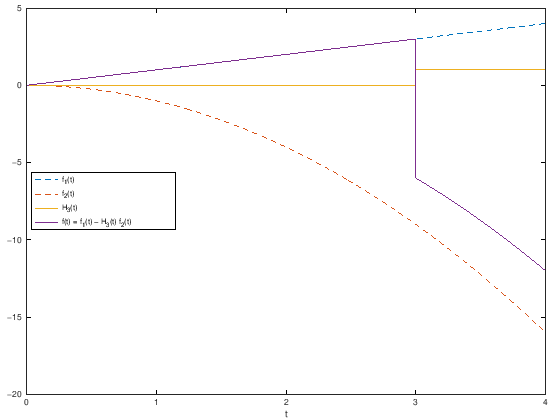

In [ ]:
t = linspace(0, 4, 801);

H3 = t>=3;  #define H_1(t)

plot(t, t, '--', 'DisplayName', "f_0(t)")
hold on 
plot(t, -t.^2, '--', 'DisplayName', "f_1(t)")
plot(t, H3, 'DisplayName', 'H_3(t)')
plot(t, t- t.^2 .*H3, 'DisplayName', "f(t) = f_0(t) - H_3(t) f_1(t)")  # this plots with 1 color, 
                         # but it includes the jump as a vertical line
xlabel('t')
legend("location", "west")

### General procedure for the Laplace Transform of a Piecewise Continuous Function

If we want to take the Laplace Transform of a piecewise continuous function $f(t)$ with a discontinuity at $t=a$, we can follow a procedure.  The basic idea is that at a jump at $t=a$ we need to find the function that gives the difference between $f$ on the right and $f$ on the left of the jump.  Then the function can be written as whatever it is known to be on the left plus the difference times $H_a(t)$.  The example above did this with a single discontinuity, but this can be repeated.

The general procedure is:

- Find the location(s) of discontinuity, $a_1 < a_2< \cdots < a_n$
- For $t<a_1$, we set $f_0(t)$ to be a function that matches $f(t)$ in this region.  Then for $t<a_1$, $f(t) = f_0(t)$
- Next, we set $f_1(t) = f(t)-f_0(t)$ in $a_1 < t< a_2$.  Then for $t<a_2$, $f(t) = f_0(t) + H_{a_1}(t) f_1(t)$  Note that $f_0(t)+f_1(t) = f(t)$ in $a_1<t<a_2$
- At each successive point of discontinuity, we set $f_m(t) = f(t) - f_{m-1}(t)$ for $a_{m}<t<a_{m+1}$.
- Then $f(t) = f_0(t) + H_{a_1}(t) f_1(t) + H_{a_2}(t) f_2(t) + \cdots$.
- Finally to convert $f_m(t)$ to $g_m(t-a_m)$, we set $g_m(t) = f_m(t+a_m)$.

## Inverting functions involving the $t$-shift

When inverting a function $\tilde{f}(s)$, you will know you need to use the $t$-shift if $e^{-as}$ appears for some constant $a$.  If the original function $f(t)$ is discontinuous, then we some terms may have different exponentials (or no exponential).  We will have to do each one of these separately.

The inverse transform of $e^{-as}\tilde{f}(s)$ is
\begin{align*}
\mathcal{L}^{-1}[e^{-as}\tilde{f}(s)](t) &= H_a(t)\mathcal{L}^{-1} [\tilde{f}(s)](t-a)\\
& = H_a(t) f(t-a)
\end{align*}
When we do the inversion, it is helpful to use the notation $\mathcal{L}^{-1}$ until the final step.  It is very easy to accidentally end up with $H_a(t)f(t)$.


````{prf:example} Calculating $\mathcal{L}^{-1}\left[ \frac{1}{s-2} - 2e^{-s} \frac{1}{s-2} + 3 e^{-2s} \frac{1}{s-3}\right ](t)$
:label: example:invert_with_t_shift

To calculate $\mathcal{L}^{-1}[\tilde{f}(s)](t)$ where 

$$
f(s) = \frac{1}{s-2} - 2e^{-s} \frac{1}{s-2} + 3 e^{-2s} \frac{1}{s-3}
$$

we note that each term has a different exponential factor.  We will have to approach each one separately.  We can separate them out because of linearity.  We have
\begin{align*}
\mathcal{L}^{-1}[\tilde{f}(s)](t) &= \mathcal{L}^{-1} \left[\frac{1}{s-2} - 2e^{-s} \frac{1}{s-2} + 3 e^{-2s} \frac{1}{s-3} \right](t)\\
&= \mathcal{L}^{-1} \left[\frac{1}{s-2}\right](t) - 2\mathcal{L}^{-1}\left[e^{-s} \frac{1}{s-2}\right](t) + 3 \mathcal{L}^{-1}\left[e^{-2s} \frac{1}{s-3} \right](t)\\
&= e^{2t} - 2 H_1(t) \mathcal{L}^{-1}\left[ \frac{1}{s-2}\right](t-1) + 3 H_2(t)\mathcal{L}^{-1}\left[\frac{1}{s-3} \right](t-2)\\
&= e^{2t} - 2H_1(t) e^{2(t-1)} + 3 H_2(t) e^{3(t-2)}
\end{align*}
````
Notice that each time we remove an exponential $e^{-sa}$ from inside $\mathcal{L}^{-1}[\cdot](t)$, we get a factor of $H_a(t)$ and the argument of the Inverse Transform becomes $t-a$.

## Self-test

- 1 (*) We derived the transform of $H_a(t) f(t-a)$, which uses a shifted function $f$.  What would happen if instead you tried to calculate the transform of $H_a(t) g(t)$ using the same basic derivation?